# Task #1: Prediction using Supervised ML

## Author: SAJIDA SALAM




## Problem Statement
 We are provided with a dataset containing the hours spent and the scores achieved by each student.
 
 The tasks include:<b>
 - Predict the percentage of a student based on the no. of study hours.
 - Predict the score if a student studies for 9.25 hrs/ day?

## Steps followed
The solution is divided into the following sections: 
- Data understanding and exploration
- Data Visualisation 
- Data preparation
- Model building 
- evaluation

### Supress Warnings

In [164]:
import warnings
warnings.filterwarnings('ignore')

### Importing the libraries

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### Reading the data

In [166]:
inp_data = "http://bit.ly/w-data"
data = pd.read_csv(inp_data)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Understanding the data

In [167]:
# checking the dimension of the dataset
print("SHAPE:", data.shape)

SHAPE: (25, 2)


The dataset contain <b>25 rows</b> and <b>2 columns.</b>

In [168]:
# checking the info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


The data contain two columns, 'Hours' and 'Scores'. There are no null values in these columns.

In [169]:
# checking the descriptive statistics
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Exploratory Data Analysis

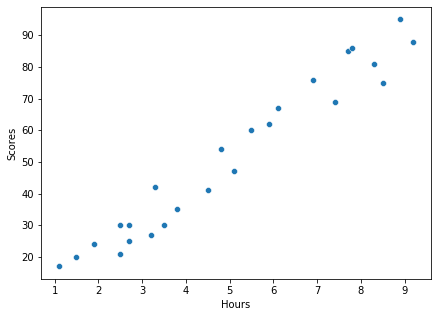

In [170]:
# scatterplot for Scores against Hours spent
plt.figure(figsize=(7,5))
sns.scatterplot(x=data["Hours"], y=data["Scores"])
plt.show()

### The graph clearly show a <b>linear correlation</b> between 'Hours spent' and 'Scores'.

Now, we will plot the heatmap to find the correlation factors between the variables.

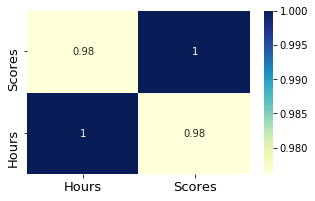

In [171]:
# plotting the heatmap
plt.figure(figsize=(5,3))
ax=sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")
top, bottom=ax.get_ylim()
ax.set_ylim(bottom-0.5,top+0.5)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

The variables are highly correlated to each other, linearly. ie. Hours and Scores are directly proportional to each other.

---
## Step 3: Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times Hours$

The $m$ values are called the model **coefficients** or **model parameters**.

---

# Model building

In this notebook, we'll build a linear regression model to predict percentage scored by a student based on the Hours studied.

### Splitting data into train and test datasets. 

In [172]:
X = data['Hours']
y = data['Scores']

In [173]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [174]:
print("Shape of X_train: ",X_train_lm.shape)
print("Shape of X_test: ",y_test_lm.shape)

Shape of X_train:  (17,)
Shape of X_test:  (8,)


While modelling with sklearn, when there's only a single feature, we need to add an additional column in order for the linear regression fit to be performed successfully.

In [175]:
# Reshaping the X_train and X_test to 2D
arr = X_train_lm.values
X_train_lm = arr.reshape((-1, 1))
arr = X_test_lm.values
X_test_lm = arr.reshape((-1, 1))

In [176]:
# printing the shape all the series after reshaping.
print("X_train:",X_train_lm.shape)
print("y_train:",y_train_lm.shape)
print()
print("X_test:",X_test_lm.shape)
print("y_test:",y_test_lm.shape)

X_train: (17, 1)
y_train: (17,)

X_test: (8, 1)
y_test: (8,)


## Linear Regression using linear_model in sklearn
We will use the `linear_model` library from `sklearn` to build the model.

In [177]:
from sklearn.linear_model import LinearRegression

In [178]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train_lm, y_train_lm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [179]:
print("Intercept:",lr.intercept_)
print("Coefficient:",lr.coef_)

Intercept: 1.495142109236383
Coefficient: [9.87171443]


### The equation we derive is..

### $ Sales = 1.495 + 9.872* Hours $

### Plotting the distributions of X_train and y_train

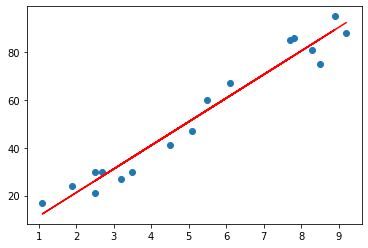

In [180]:
# The scatterplot shows the original Scores
# The lineplot shows the predicted values
plt.scatter(X_train_lm, y_train_lm)
plt.plot(X_train_lm, 1.495 + 9.872*X_train_lm, 'r')
plt.show()

## Prediction

In [181]:
# Predict the y values corresponding to X_test_lm
y_pred = lr.predict(X_test_lm)

In [182]:
# Comparing Actual vs Predicted
pd.DataFrame({'Hours':X_test_lm[:,0], 'Actual': y_test_lm, 'Predicted': y_pred})  

,Hours,Actual,Predicted
9,2.7,25,28.148771
22,3.8,35,39.007657
13,3.3,42,34.071800
11,5.9,62,59.738257
5,1.5,20,16.302714
19,7.4,69,74.545829
23,6.9,76,69.609972
21,4.8,54,48.879371


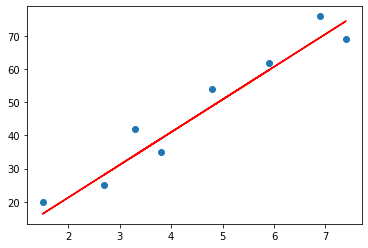

In [183]:
# The scatterplot shows the original Scores
# The lineplot shows the predicted values
plt.scatter(X_test_lm, y_test_lm)
plt.plot(X_test_lm, y_pred, 'r')
plt.show()

## Evaluation

As part of the evaluation, we will calculate the following parameters.
- R-squared value
- Root Mean Squared Error(RMSE)
- Mean Absolute Error(MAE)

In [185]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

## R-squared value

In [186]:
# finds the r2 value
r_squared = r2_score(y_test_lm, y_pred)
print("R2 value:",round(r_squared,3))

R2 value: 0.931


Ideally, R-Squared value should be between 0 to 1. A bigger value indicates a better fit between the predicted and actual values.

## Root Mean Squared Error(RMSE)

In [187]:
#Returns the mean squared error; we'll take a square root
print("RMSE value:",round(np.sqrt(mean_squared_error(y_test_lm, y_pred)),4))

RMSE value: 5.0674


Lower the RMSE value, better the fit of the model.

## Mean Absolute Error

In [188]:
#finds the mean absolute error
print("MAE value:",round(mean_absolute_error(y_test_lm, y_pred),3))

MAE value: 4.763


Lower the MAE value, better the fit of the model.

# Predicting the score if a student studies for 9.25 hrs/ day

In [189]:
duration=9.25
score=lr.predict([[duration]])
pd.DataFrame({'Hours':duration, 'Score': np.round(score,1)})  

,Hours,Score
0,9.25,92.8


### According to the model if a student studies for 9.25 hrs/ day, he is likely to get 92.8 %

### THANK YOU